# Logistic Regression on Algerian forest fire Dataset

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and Not Fire

so we will predict classes column(dependent feature) on the basis of independent features

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [3]:
#removing unimportant row
df.drop([122,123,167],inplace=True)

In [4]:
#review of data
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
#shape of our data
df.shape

(243, 14)

In [6]:
#features in our dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
#some cleaning of our data
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
#droping day column because we don't need it for creating our model
df.drop(['day'],axis=1,inplace=True)

In [9]:
#just clean our classes column
df['Classes']=[i.strip() for i in df['Classes']]
df['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 243, dtype: object

In [10]:
#cheacking datatypes of our column so we can convert it into another datadtpe according to our need
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        243 non-null    object
 1   year         243 non-null    object
 2   Temperature  243 non-null    object
 3   RH           243 non-null    object
 4   Ws           243 non-null    object
 5   Rain         243 non-null    object
 6   FFMC         243 non-null    object
 7   DMC          243 non-null    object
 8   DC           243 non-null    object
 9   ISI          243 non-null    object
 10  BUI          243 non-null    object
 11  FWI          243 non-null    object
 12  Classes      243 non-null    object
dtypes: object(13)
memory usage: 26.6+ KB


C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes', ylabel='count'>

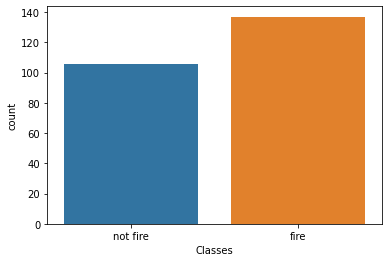

In [11]:
#Here we are checking that our dependent variable is balance or imbalance if it is balance so we can check accuracy if not so we have try some another method
sns.countplot(df['Classes'],data=df)

so we can say that our dataset is balance by seen countplot so we can check accuracy easily

In [12]:
# it is a classification problem so we have to convert it into 0 , 1.
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [13]:
#this is sample of our data
df.sample(10)

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
223,09,2012,30,88,14,0,82.5,6.6,26.1,3,8.1,2.7,1
206,08,2012,37,53,14,0,89.5,41.1,127.5,8,45.5,18.1,1
245,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0
199,08,2012,35,46,13,0.3,83.9,16.9,54.2,3.5,19,5.5,1
68,08,2012,32,60,18,0.3,77.1,11.3,47,2.2,14.1,2.6,0
85,08,2012,35,60,15,0,88.9,43.9,181.3,8.2,54.7,20.3,1
88,08,2012,34,64,16,0,89.4,50.2,210.4,7.3,62.9,19.9,1
33,07,2012,33,78,17,0,80.1,4.6,18.5,2.7,5.7,1.7,0
71,08,2012,35,63,13,0,88.9,21.7,77,7.1,25.5,12.1,1
224,09,2012,30,80,15,0,83.1,7.9,34.5,3.5,10,3.7,1


In [14]:
#cheacking null value if any
df.isnull().sum()

month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

so there is no null value in our dataset

In [15]:
#these column should be in integer format
df[['month','year', 'Temperature', 'RH', 'Ws','Classes']]=df[['month','year', 'Temperature', 'RH', 'Ws','Classes']].astype(int)

In [16]:
#these column should be in flat format
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
#now checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        243 non-null    int32  
 1   year         243 non-null    int32  
 2   Temperature  243 non-null    int32  
 3   RH           243 non-null    int32  
 4   Ws           243 non-null    int32  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int32  
dtypes: float64(7), int32(6)
memory usage: 20.9 KB


we have change datatypes of column so we can perform mathematical operation on them

<AxesSubplot:>

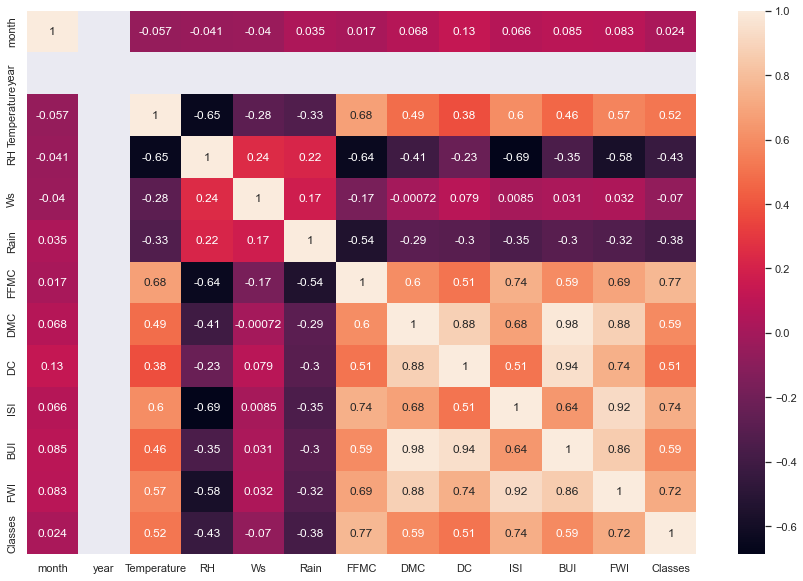

In [18]:
#this is the heatmap of our data with the help of this we can decide which column we should for our model prediction so the expense of model building can be reduce.
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

'DMC' and 'DC' is highly correlated with 'BUI' so we can drop both and take BUI

In [19]:
df.drop(['DMC','DC'],axis=1,inplace=True)

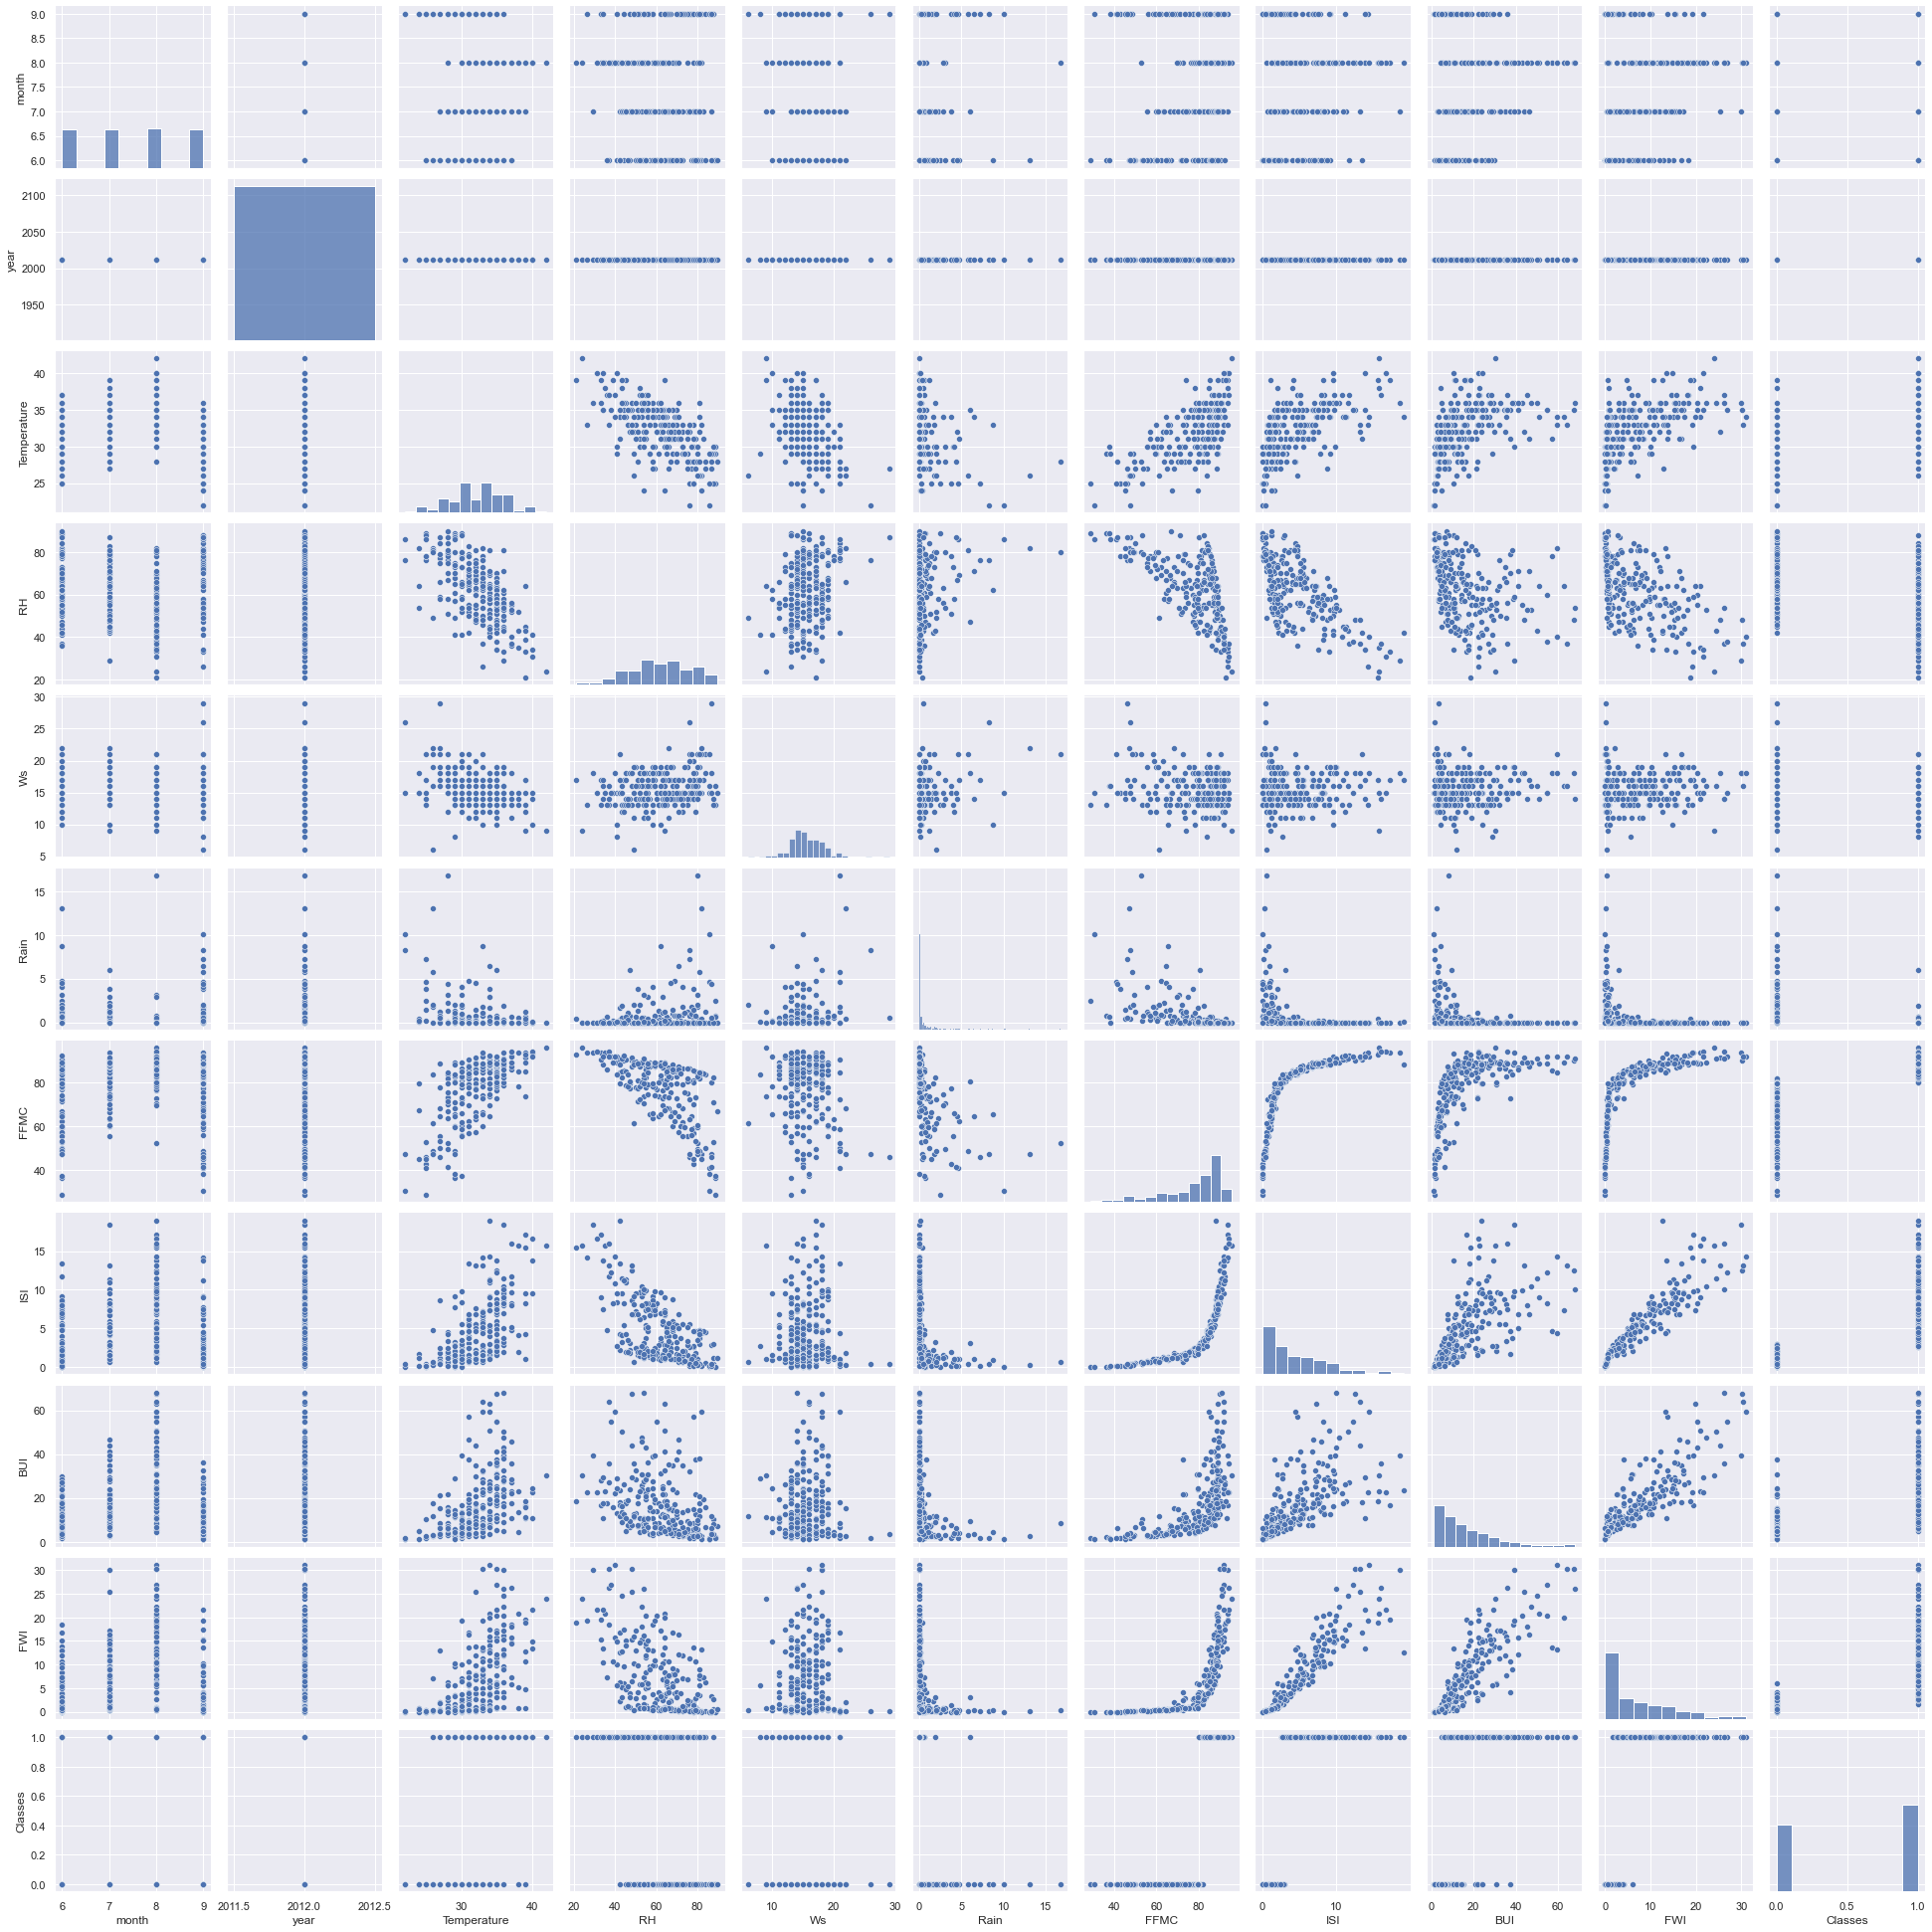

In [20]:
#this is pairplot of our data with the help of this we can see the graphical relationship between all features
sns.pairplot(df)

In [21]:
#cheacking duplicated values if any so we can remove it
df[df.duplicated()]

,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes


There is no duplicated values in our dataset

In [22]:
df.groupby('month')['Classes'].count() 

month
6    60
7    61
8    62
9    60
Name: Classes, dtype: int64

Featching the row wich has maximum tempearture

In [23]:
df[df['Temperature']==max(df['Temperature'])]

,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes
201,8,2012,42,24,9,0.0,96.0,15.7,30.4,24.0,1


Featching how many times fire in 8th month 

In [24]:
df[(df['month']==8) & (df['Classes']==1)]['Classes'].count()

51

# Creating a new dataframe in which we can analysis 'Rain', 'Temperature','Classes' with respect to 'month'

In [25]:
d1= pd.DataFrame(df.groupby('month')['Rain'].sum())

In [26]:
d2= pd.DataFrame(df.groupby('month')['Temperature'].sum())

In [27]:
d3= pd.DataFrame(df.groupby('month')['Classes'].sum())

In [28]:
df_month_anls=pd.concat([d1,d2,d3],axis=1)

In [29]:
df_month_anls

,Rain,Temperature,Classes
month,,,
6,58.5,1848,25
7,27.8,2012,38
8,27.8,2191,51
9,71.3,1762,23


so we can see that in 8th month temperature is too high and Rain is too low because of this fire in 8th month is more than other month in thi region

so we can use this data and we can perform some action in this month so we can prevent fire

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\distributions.py

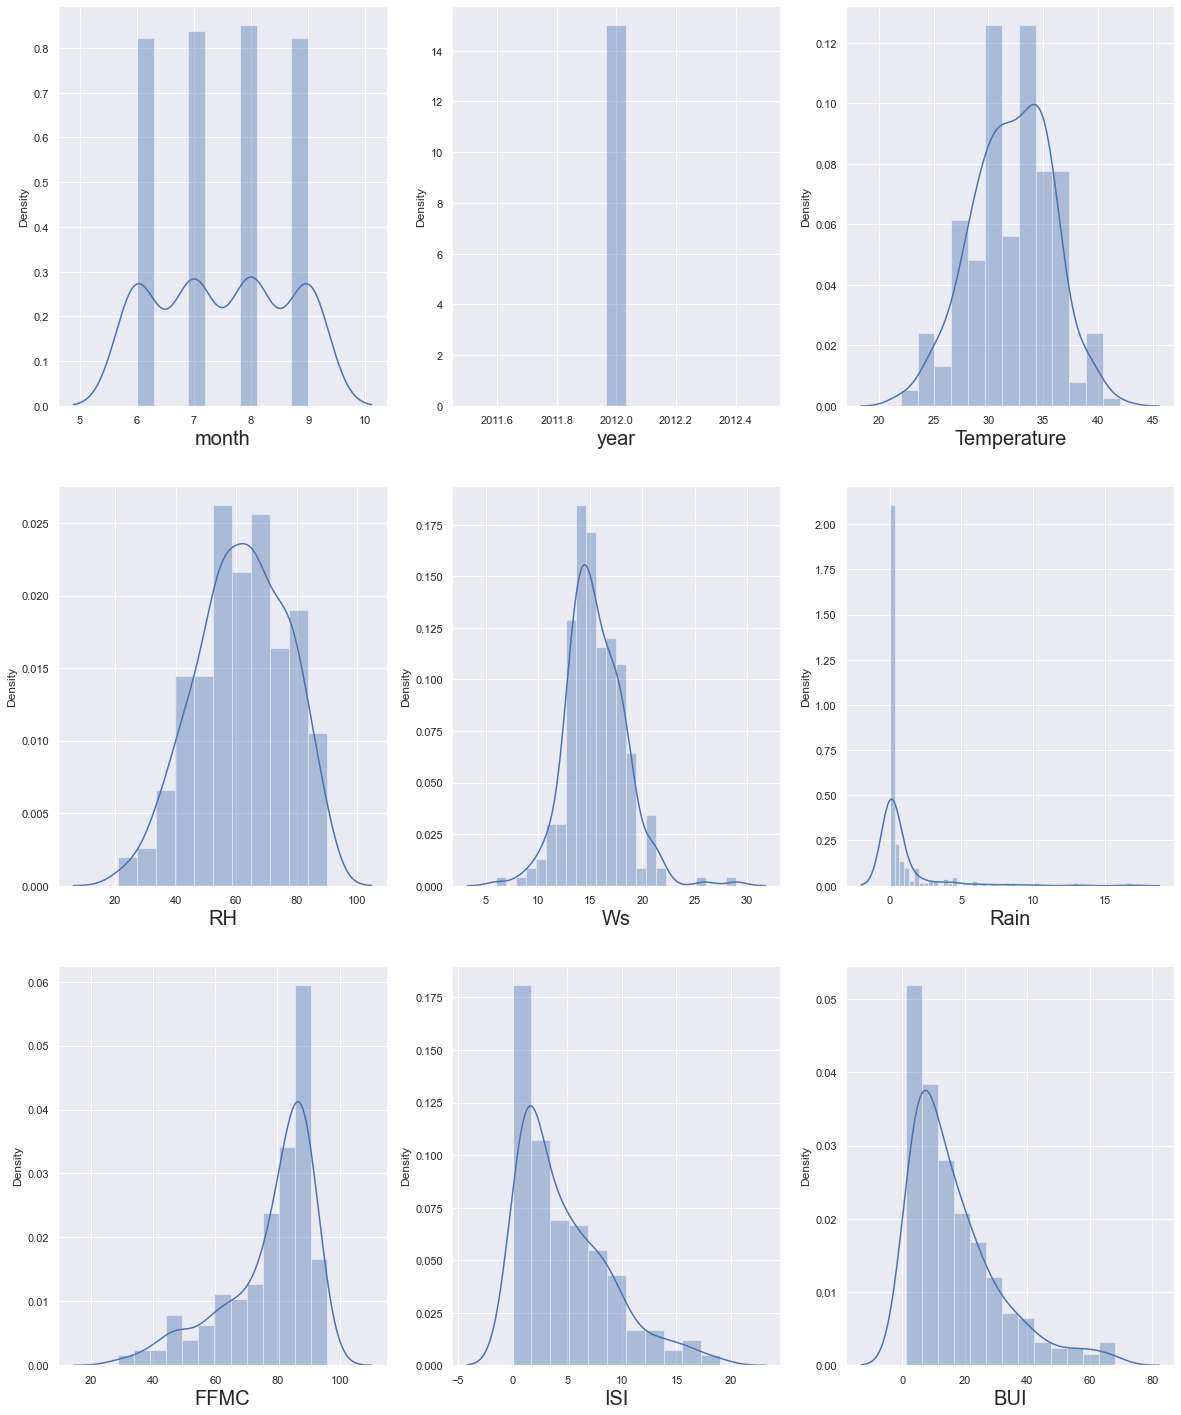

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [31]:
df.head(1)

,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes
0,6,2012,29,57,18,0.0,65.7,1.3,3.4,0.5,0


# Selecting independent and dependent feature for our model training

In [39]:
x=df.iloc[:,0:-1] # independent feature
y=df.iloc[:,-1] #dependent feature

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [42]:
#Here we are train our model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

our model has trained now we will test our model and check accuracy

In [43]:
# Here we are test our data and stored prediction value in y_pred variable
y_pred = log_reg.predict(x_test)

In [44]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[33,  1],
       [ 1, 46]], dtype=int64)

now checking accuracy

In [45]:
accuracy=accuracy_score(y_test,y_pred)

In [46]:
accuracy

0.9753086419753086

# conclusion

1) we have select 10 independent feature for our model.

2) we had one dependent feature which is Classes in classes we have two outcome one is 'Fire' another is 'Not Fire' which we have to predict.

3) so the dataset is balanced.

4) we have trained our model and after training we have check the accuracy of our data with test data.

5) we got approx 97 percent accuracy so we can say that our model is good.
